# Random Forest

In [208]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline
import folium
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.metrics import log_loss
from collections import Counter


from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalanceCascade
import warnings
warnings.filterwarnings('ignore')

In [209]:
data_path = os.path.join(os.getcwd(), 'df_clean_tipus_accidents.csv')
df_clean = pd.read_csv(data_path, delimiter = ',', encoding='latin-1')
df_clean.drop(['Unnamed: 0'], axis=1, inplace=True)
df_clean

,Codi_expedient,Descripcio_tipus_accident,NK_Any,Descripcio_tipus_persona,Descripcio_tipus_de_vehicle,Descripcio_victimitzacio,Edat,Codi_barri_x,Codi_carrer,Hora_dia,Mes_any,Dia_mes,Longitud,Latitud,...,Sortida_Sol,Posta_Sol,Dif_PostaoSortida_Sol,Num_Semaf_Barri,Codi_barri_y,Dist_semaf,T,HR,PPT,VV10ESC,RVX10,Conductor,Passatger,Vianant
0,2017S001023,Col.lisiÃ³ lateral,2017,Conductor,Motocicleta,Ferit lleu,33,64,209900,15,2,7,2.186591,41.415280,...,7.0,18.0,3.0,2010,64,0.24280,16.3,56,0.0,2.2,4.0,1,0,0
1,2017S009198,Col.lisiÃ³ fronto-lateral,2017,Conductor,Motocicleta,Ferit lleu,48,64,346402,14,11,7,2.184483,41.415436,...,7.0,17.0,3.0,2010,64,0.13798,15.9,22,0.0,3.1,6.0,1,0,0
2,2017S006546,Abast,2017,Conductor,Motocicleta,Ferit lleu,47,64,297001,14,7,27,2.179666,41.415060,...,6.0,21.0,7.0,2010,64,0.10725,28.5,57,0.0,3.8,7.3,1,0,0
3,2017S003698,Caiguda interior vehicle,2017,Passatger,Autobus,Ferit lleu,68,64,297001,20,4,25,2.177034,41.413077,...,6.0,20.0,0.0,2010,64,0.01711,15.1,83,0.0,1.6,3.1,0,1,0
4,2017S004977,Abast,2017,Conductor,Motocicleta,Ferit lleu,41,64,297001,11,6,7,2.176086,41.412368,...,6.0,21.0,5.0,2010,64,0.01015,18.9,67,0.0,2.2,6.0,1,0,0
5,2017S008080,Abast,2017,Conductor,Motocicleta,Ferit lleu,29,64,297001,19,9,30,2.176086,41.412368,...,7.0,19.0,0.0,2010,64,0.01015,19.8,87,0.0,0.3,2.0,1,0,0
6,2017S004180,Abast,2017,Conductor,Motocicleta,Ferit lleu,32,64,105304,9,5,11,2.177640,41.410550,...,6.0,21.0,3.0,2010,64,0.00711,14.0,96,0.0,1.0,2.5,1,0,0
7,2017S009138,Col.lisiÃ³ fronto-lateral,2017,Passatger,Ciclomotor,Ferit lleu,26,64,289105,1,11,5,2.179003,41.409722,...,7.0,17.0,6.0,2010,64,0.00247,15.2,82,0.0,3.2,7.4,0,1,0
8,2017S009138,Col.lisiÃ³ fronto-lateral,2017,Conductor,Ciclomotor,Ferit lleu,40,64,289105,1,11,5,2.179003,41.409722,...,7.0,17.0,6.0,2010,64,0.00247,15.2,82,0.0,3.2,7.4,1,0,0
9,2017S001925,Atropellament,2017,Conductor,Ciclomotor,Ferit lleu,19,64,350308,13,3,9,2.184175,41.408507,...,7.0,18.0,5.0,2010,64,0.00287,17.0,58,0.0,2.7,4.9,1,0,0


In [210]:
### Select the most common classes

select_colisions = df_clean['Descripcio_tipus_accident'].value_counts().iloc[:8].index
df_clean_colision = df_clean[df_clean["Descripcio_tipus_accident"].isin(select_colisions)]

df_clean_colision['Descripcio_tipus_accident'].unique()

array(['Col.lisiÃ³ lateral', 'Col.lisiÃ³ fronto-lateral', 'Abast',
       'Caiguda interior vehicle', 'Atropellament',
       'Caiguda (dues rodes)', 'Xoc contra element estÃ\xa0tic',
       'Abast multiple'], dtype=object)

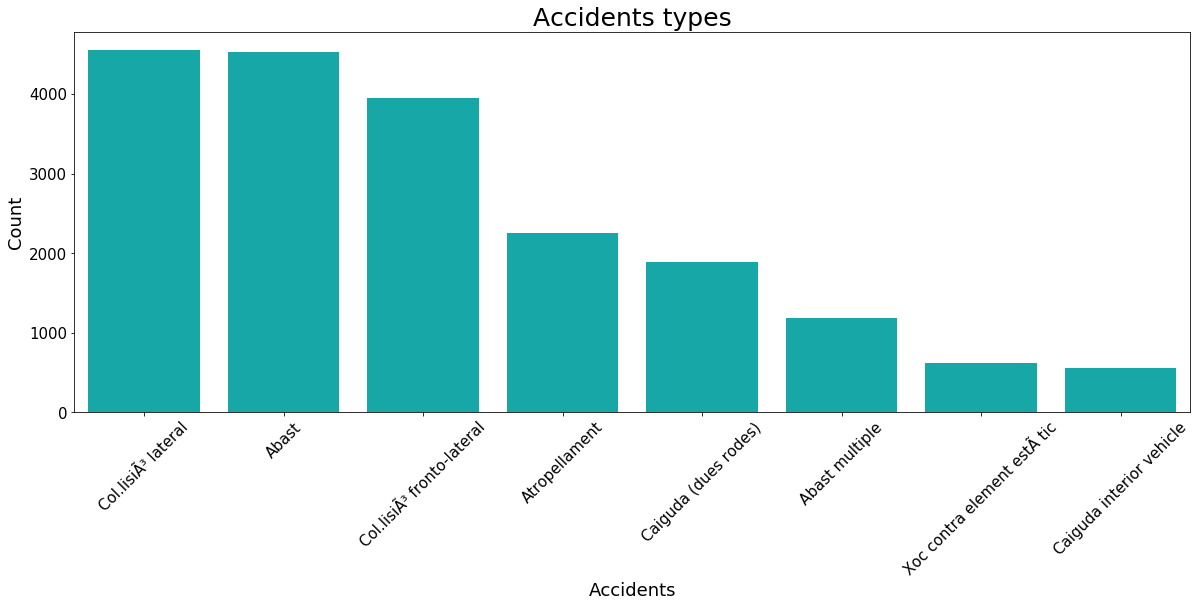

In [211]:
fig, ax2 = plt.subplots(figsize=(20,7))

sns.countplot(df_clean_colision['Descripcio_tipus_accident'], ax=ax2, 
              order = df_clean_colision['Descripcio_tipus_accident'].value_counts().index,
              color = 'c'
#               hue=df_clean['Descripcio_tipus_de_vehicle']
             )
ax2.set_xlabel(' ')
ax2.set_ylabel('')
plt.ylabel('Count', size=18)
plt.xlabel('Accidents', size=18)
ax2.set_title('Accidents types', size=25)
ax2.tick_params(labelsize=15)
plt.xticks(rotation=45)
plt.show()

In [212]:
df_clean_colision=df_clean_colision[df_clean['Descripcio_tipus_accident']!='Desconegut']

# Labels are the values we want to predict
Y = df_clean_colision['Descripcio_tipus_accident'] 
Y = pd.get_dummies(Y)

# # Remove the labels from the features
# # axis 1 refers to the columns
X = df_clean_colision.drop(columns = ['Num_Greus', 'Num_Lleus', 'Num_Morts', 'Codi_expedient','Descripcio_victimitzacio',
                                     'Descripcio_tipus_persona','Descripcio_tipus_de_vehicle','Descripcio_tipus_accident'], axis = 1)
# Saving feature names for later use
feature_list = list(Y.columns)
num_columns = len(X.columns)
pd.set_option("display.max_columns", num_columns)
X

,NK_Any,Edat,Codi_barri_x,Codi_carrer,Hora_dia,Mes_any,Dia_mes,Longitud,Latitud,Num_Victimes,Num_Vehicles_Implicats,Poblacio,Nombre_vehicles_parc,Any,Sortida_Sol,Posta_Sol,Dif_PostaoSortida_Sol,Num_Semaf_Barri,Codi_barri_y,Dist_semaf,T,HR,PPT,VV10ESC,RVX10,Conductor,Passatger,Vianant
0,2017,33,64,209900,15,2,7,2.186591,41.415280,1,2,38371,9172,2017.0,7.0,18.0,3.0,2010,64,0.24280,16.3,56,0.0,2.2,4.0,1,0,0
1,2017,48,64,346402,14,11,7,2.184483,41.415436,1,2,38371,9172,2017.0,7.0,17.0,3.0,2010,64,0.13798,15.9,22,0.0,3.1,6.0,1,0,0
2,2017,47,64,297001,14,7,27,2.179666,41.415060,1,2,38371,9172,2017.0,6.0,21.0,7.0,2010,64,0.10725,28.5,57,0.0,3.8,7.3,1,0,0
3,2017,68,64,297001,20,4,25,2.177034,41.413077,1,1,38371,0,2017.0,6.0,20.0,0.0,2010,64,0.01711,15.1,83,0.0,1.6,3.1,0,1,0
4,2017,41,64,297001,11,6,7,2.176086,41.412368,1,2,38371,9172,2017.0,6.0,21.0,5.0,2010,64,0.01015,18.9,67,0.0,2.2,6.0,1,0,0
5,2017,29,64,297001,19,9,30,2.176086,41.412368,1,2,38371,9172,2017.0,7.0,19.0,0.0,2010,64,0.01015,19.8,87,0.0,0.3,2.0,1,0,0
6,2017,32,64,105304,9,5,11,2.177640,41.410550,1,2,38371,9172,2017.0,6.0,21.0,3.0,2010,64,0.00711,14.0,96,0.0,1.0,2.5,1,0,0
7,2017,26,64,289105,1,11,5,2.179003,41.409722,2,2,38371,2553,2017.0,7.0,17.0,6.0,2010,64,0.00247,15.2,82,0.0,3.2,7.4,0,1,0
8,2017,40,64,289105,1,11,5,2.179003,41.409722,2,2,38371,2553,2017.0,7.0,17.0,6.0,2010,64,0.00247,15.2,82,0.0,3.2,7.4,1,0,0
9,2017,19,64,350308,13,3,9,2.184175,41.408507,2,1,38371,2553,2017.0,7.0,18.0,5.0,2010,64,0.00287,17.0,58,0.0,2.7,4.9,1,0,0


In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    train_size=0.75, 
                                                    random_state = 0)

In [214]:
print('Number of instances in X: {}'.format(np.shape(X)[0]))

print('\nNumber of instances in X_train: {}'.format(X_train.shape))
print('Number of instances in X_train: {}'.format(y_train.shape))
print('Number of instances in X_test: {}'.format(X_test.shape))
print('Number of instances in X_test: {}'.format(y_test.shape))


Number of instances in X: 19542

Number of instances in X_train: (14656, 28)
Number of instances in X_train: (14656, 8)
Number of instances in X_test: (4886, 28)
Number of instances in X_test: (4886, 8)


In [215]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [216]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver ='full')  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)

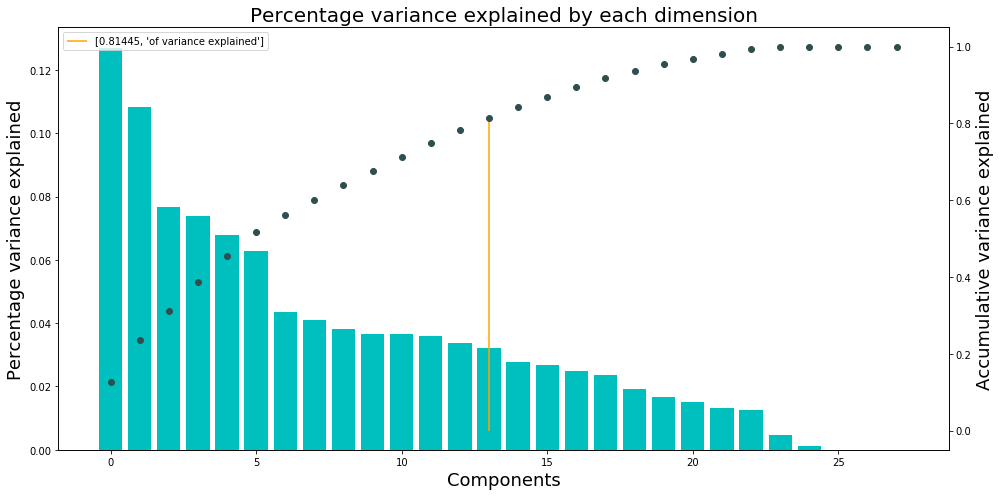

In [217]:
ac_var = 0
x = 0
bar = True

fig, ax1 = plt.subplots(figsize=(14, 7))
plt.xlabel('Components',fontsize=18)
plt.ylabel('Percentage variance explained', fontsize=18)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(ac_var)  # we already handled the x-label with ax1
plt.ylabel('Accumulative variance explained', fontsize=18)

while x < X_train_pca.shape[1]:
    ax1.tick_params(axis='y')
    ax1.bar(x, pca.explained_variance_ratio_[x], width=0.8, color="c") #Eigenvalues
    ac_var = pca.explained_variance_ratio_[x] + ac_var
    ax2.plot(x, ac_var, linestyle='-', marker='o',color="darkslategray")
    if ac_var > 0.8 and bar == True:
        plt.vlines(x, 0, ac_var, colors="orange", linestyles='solid', label = [round(ac_var,5),'of variance explained'] )
        bar = False
    x = x + 1

plt.title('Percentage variance explained by each dimension',fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

In some dataset all the features are contributing equally to the overall variance, therefore all the principal components are crucial to the predictions and none can be ignored.

In [229]:
param_grid = { 
    'n_estimators': [100, 500, 2000],
#     'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 50, 200],
#     'criterion' :['gini', 'entropy']
}

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Random forest
clf_rf = RandomForestClassifier(criterion='gini',
                                random_state=0)

clf_rf_grid = GridSearchCV(clf_rf, param_grid, cv=3, n_jobs=-1)

# Train model
model = clf_rf_grid.fit(X_train, y_train)

In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf_rf_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.35      0.48      1157
           1       0.95      0.75      0.84       279
           2       0.91      0.88      0.90       520
           3       0.51      0.21      0.30       456
           4       0.87      0.76      0.81       136
           5       0.78      0.33      0.46       993
           6       0.67      0.26      0.37      1206
           7       0.36      0.17      0.23       139

   micro avg       0.77      0.39      0.52      4886
   macro avg       0.73      0.46      0.55      4886
weighted avg       0.74      0.39      0.50      4886
 samples avg       0.39      0.39      0.39      4886



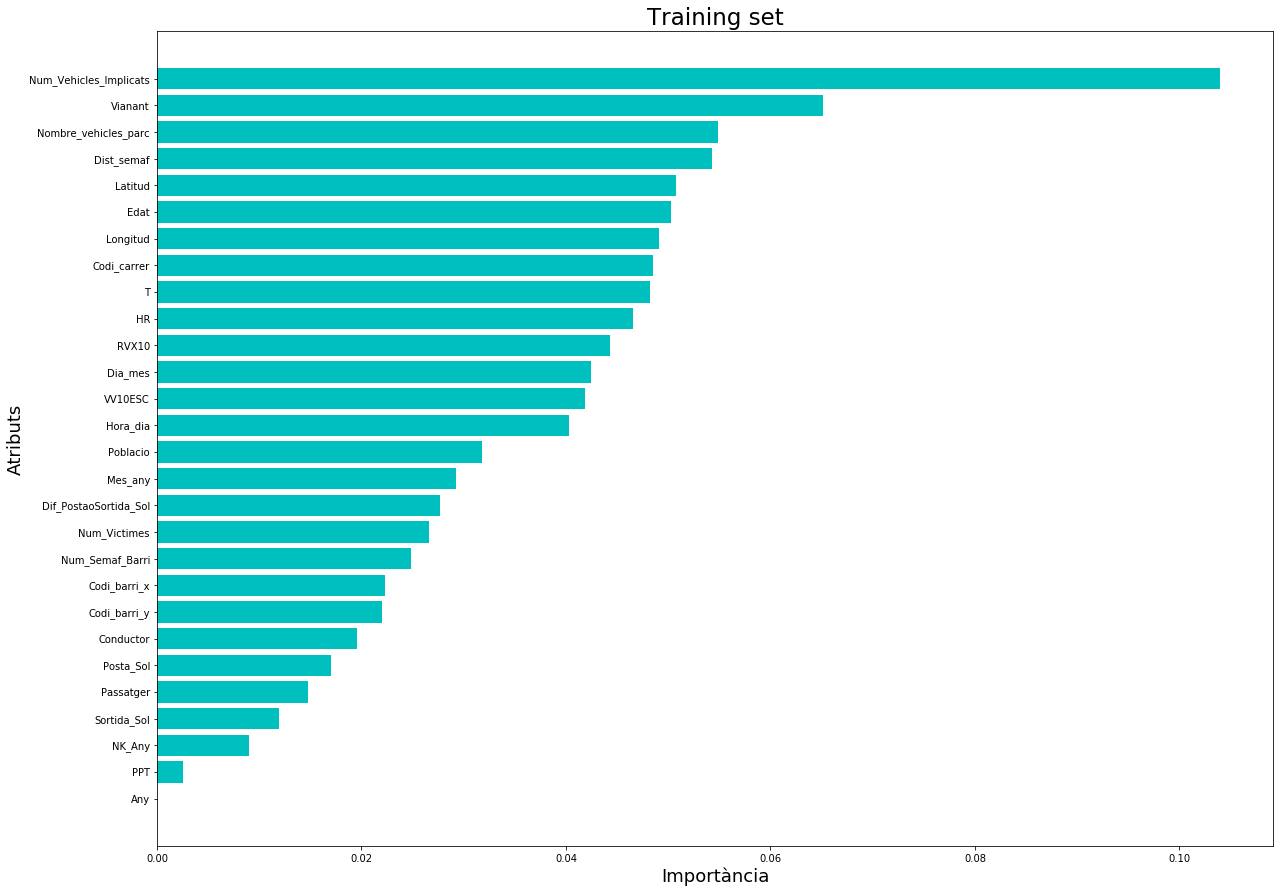

In [243]:
imp = clf_rf_grid.best_estimator_.feature_importances_
names = X.columns

imp, names = zip(*sorted(zip(imp, names)))

fig = plt.figure(figsize=(20,15))
ax = fig.gca()

plt.barh(range(len(names)),imp, align = 'center', color='c')
plt.yticks(range(len(names)), names)

ax.set_ylabel('Atributs', size = 18)
ax.set_xlabel('Importància', size = 18)
ax.set_title('Training set', size = 23)
plt.show()

The cost-sensitive approach would be to assign different weights to different classes. So if the minority class is assigned a higher weight and thus higher misclassification cost, then that can help reduce its biasness towards the majority class. You can use the class weight parameter of random forest in scikit-learn to assign weights to each class.

In [244]:
y_pred = clf_rf_grid.predict(X_train) 
y_test_pred = clf_rf_grid.predict(X_test)

In [245]:
print('Classification accuracy on training set: {:.5f}'.format(accuracy_score(y_train,y_pred)))
print('Log Loss on training set: {:.5f}'.format(log_loss(y_train,y_pred)))

print('\nClassification accuracy on test set: {:.5f}'.format(accuracy_score(y_test,y_test_pred))) 
print('Log Loss on test set: {:.5f}'.format(log_loss(y_test,y_test_pred))) 

Classification accuracy on training set: 0.93811
Log Loss on training set: 0.84184

Classification accuracy on test set: 0.39460
Log Loss on test set: 4.98581


In [246]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier().fit(X_train, y_train) 
pred_y_d = dummy_classifier.predict(X_test)
print('Dummy Classifier accuracy on the test set: {:.5f}'.format(accuracy_score(y_test,pred_y_d)))
print('Log Loss of the Dummy Classifier: {:.5f}'.format(log_loss(y_test,pred_y_d))) 

Dummy Classifier accuracy on the test set: 0.07716
Log Loss of the Dummy Classifier: 17.45137


In [247]:
### fer manualment el dummy classifier.
total = len(df_clean_colision)
accuracy = 0
for tipus in df_clean_colision['Descripcio_tipus_accident'].unique():
    accidents = df_clean_colision[df_clean_colision['Descripcio_tipus_accident']==tipus]
    value = len(accidents)
    print('Tipus col·lisió: {} té {} entrades. Percentatge: {:.2f}%.\n'.format(tipus,value, value/total*100))


Tipus col·lisió: Col.lisiÃ³ lateral té 4553 entrades. Percentatge: 23.30%.

Tipus col·lisió: Col.lisiÃ³ fronto-lateral té 3950 entrades. Percentatge: 20.21%.

Tipus col·lisió: Abast té 4532 entrades. Percentatge: 23.19%.

Tipus col·lisió: Caiguda interior vehicle té 555 entrades. Percentatge: 2.84%.

Tipus col·lisió: Atropellament té 2248 entrades. Percentatge: 11.50%.

Tipus col·lisió: Caiguda (dues rodes) té 1892 entrades. Percentatge: 9.68%.

Tipus col·lisió: Xoc contra element estÃ tic té 621 entrades. Percentatge: 3.18%.

Tipus col·lisió: Abast multiple té 1191 entrades. Percentatge: 6.09%.



In [248]:
from sklearn import metrics
confusion_matrix(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1))

array([[1054,    4,    1,   29,    1,   19,   42,    7],
       [  66,  208,    1,    0,    0,    0,    3,    1],
       [  33,    0,  458,   12,    3,    7,    5,    2],
       [ 258,    0,   22,   96,    5,   19,   47,    9],
       [  24,    0,    1,    3,  104,    1,    2,    1],
       [ 591,    0,    9,   16,    4,  328,   38,    7],
       [ 815,    5,    6,   19,    3,   32,  310,   16],
       [  70,    2,    3,   12,    0,   14,   14,   24]], dtype=int64)

In [249]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    fig = plt.figure(figsize=(10,7))
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title, size=18)
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.show()

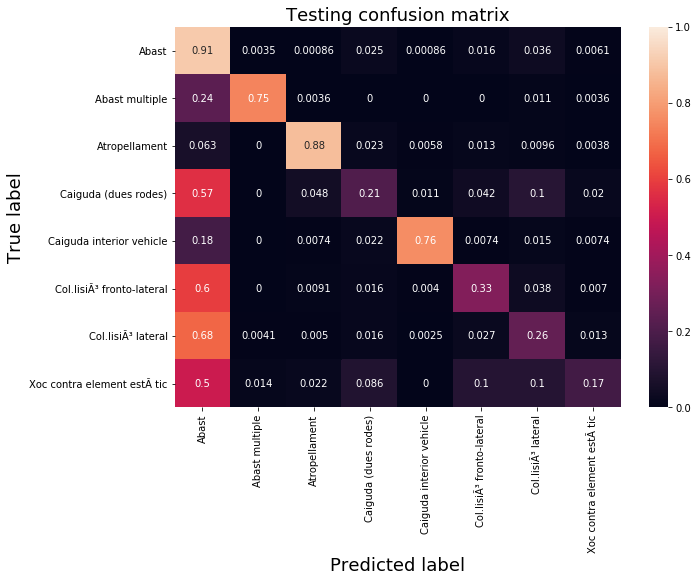

In [250]:
cm = confusion_matrix(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1))
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=feature_list ,title='Testing confusion matrix')
plt.show()